In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy.stats import linregress

In [2]:
csv_file = 'cta_ridership_historical.csv'
cta_data_df = pd.read_csv(csv_file)

cta_data_df.head()
    

,service_date,day_type,bus,rail_boardings,total_rides
0,1/1/01,U,297192,126455,423647
1,1/2/01,W,780827,501952,1282779
2,1/3/01,W,824923,536432,1361355
3,1/4/01,W,870021,550011,1420032
4,1/5/01,W,890426,557917,1448343


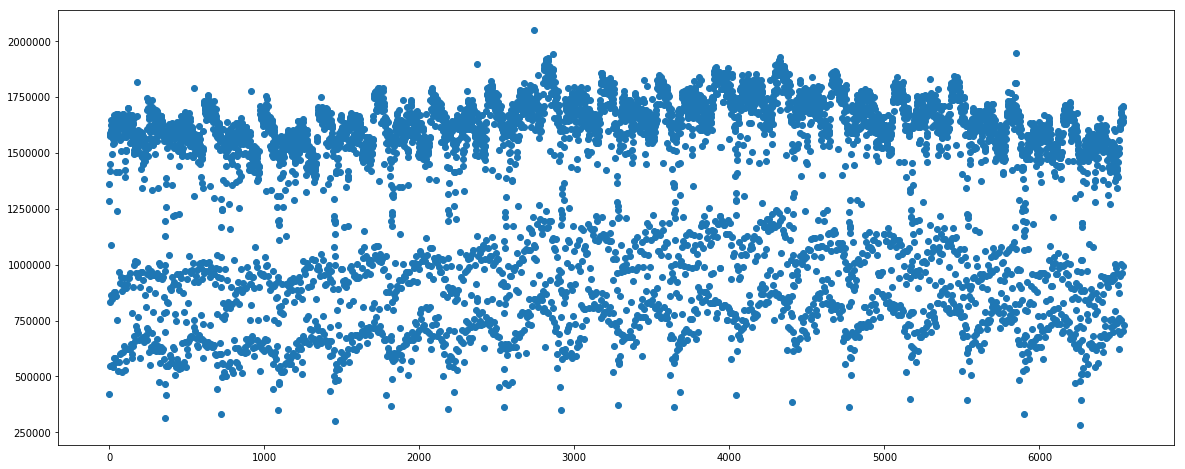

In [3]:
x_axis = np.arange(len(cta_data_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,8))
plt.scatter(x_axis, cta_data_df['total_rides'])
plt.show()

NameError: name 'xticks' is not defined

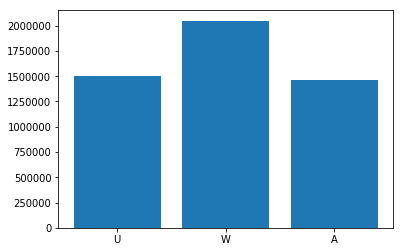

In [4]:
x_axis = cta_data_df['day_type']

plt.bar(x_axis, cta_data_df['total_rides'])


plt.xlabel('Day Type')
plt.ylabel('Total Rides')
plt.title('Total CTA Rides by Day Type')

plt.show()

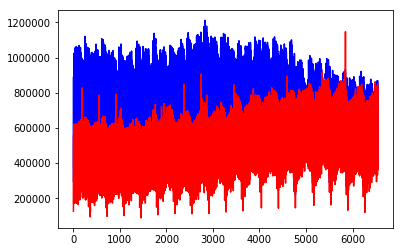

<Figure size 2160x720 with 0 Axes>

In [5]:
bus_rides = cta_data_df['bus']
l_rides = cta_data_df['rail_boardings']

x_axis = np.arange(len(cta_data_df))

# fig, ax = plt.subplots()
# ax.plot(x_axis, bus_rides, label='Original')


# window_list = [5, 10, 15, 20, 25]
# y_avg = np.zeroes((len(window_list), N))
# for i, window in enumerate(window_list):
#     avg_mask = np.ones(window) / window
#     y_avg[i, :] = np.convolve(bus_rides, avg_mask, 'same')
#     ax.plot(x_axis, y_avg[i, :] + (i+1)*50, label=window

bus_rides, = plt.plot(x_axis, bus_rides, color='blue')
l_rides, = plt.plot(x_axis, l_rides, color='red')
plt.figure(figsize=(30, 10))
plt.show()

In [14]:
bus_rides = cta_data_df['bus']
l_rides = cta_data_df['rail_boardings']

x_axis = np.arange(len(cta_data_df))

(slope, intercept, _, _, _) = linregress(x_axis, bus_rides)
fit = slope * x_axis + intercept

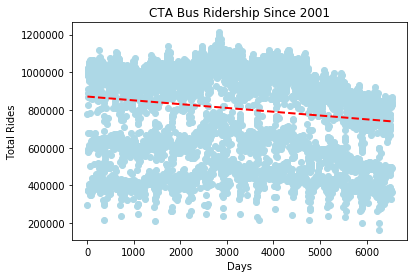

In [15]:
fig, ax = plt.subplots()

ax.plot(x_axis, bus_rides, linewidth=0, marker='o', color='lightblue')
ax.plot(x_axis, fit, 'b--', color='red', linewidth=2)
plt.title('CTA Bus Ridership Since 2001')
plt.xlabel('Days')
plt.ylabel('Total Rides')
plt.show()

In [16]:
(slope, intercept, _, _, _) = linregress(x_axis, l_rides)
fit = slope * x_axis + intercept

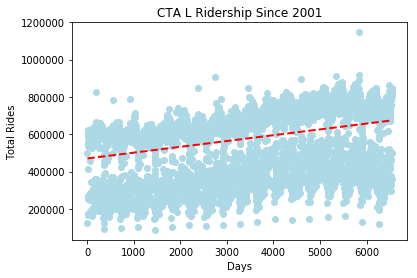

In [17]:
fig, ax = plt.subplots()

ax.plot(x_axis, l_rides, linewidth=0, marker='o', color='lightblue')
ax.plot(x_axis, fit, 'b--', color='red', linewidth=2)
plt.title('CTA L Ridership Since 2001')
plt.xlabel('Days')
plt.ylabel('Total Rides')
plt.show()

In [18]:
cta_data_df['total_rides'].max()

2049519

In [19]:
cta_data_df.groupby('day_type').max()

,service_date,bus,rail_boardings,total_rides
day_type,,,,
A,9/9/17,791707,708351,1463925
U,9/9/18,791721,711335,1503056
W,9/9/16,1211992,1146516,2049519


In [20]:
cta_data_df['total_rides'].min()

282910

In [21]:
cta_data_df.groupby('day_type').min()

,service_date,bus,rail_boardings,total_rides
day_type,,,,
A,1/10/04,335207,198644,611588
U,1/1/01,164256,87992,282910
W,1/10/01,219234,191941,428521


In [22]:
cta_data_df.groupby('day_type').mean()

,bus,rail_boardings,total_rides
day_type,,,
A,595578.740064,397874.040816,9.934528e+05
U,412730.925144,287511.833013,7.002428e+05
W,937479.496390,673106.875738,1.610586e+06


In [23]:
df_reset = cta_data_df.set_index('day_type')
weekday_data = df_reset.loc['W']
weekday_data.head()

,service_date,bus,rail_boardings,total_rides
day_type,,,,
W,1/2/01,780827,501952,1282779
W,1/3/01,824923,536432,1361355
W,1/4/01,870021,550011,1420032
W,1/5/01,890426,557917,1448343
W,1/8/01,985221,590706,1575927


In [24]:
rolling_av = weekday_data.rolling((len(weekday_data)), on='total_rides')
rolling_av

Rolling [window=4571,center=False,axis=0,on=total_rides]

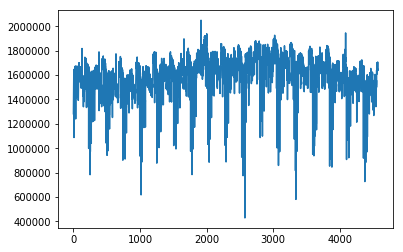

In [25]:
x_axis = np.arange(len(weekday_data))

plt.plot(x_axis, weekday_data['total_rides'])

plt.show()